# Estatística aplicada: qual app é melhor?

## O problema

Duas empresas, $A$ e $B$, publicaram seus respectivos apps na Play Store. O app da empresa $A$ foi considerado "bom" por 90% das 100 pessoas que o avaliaram. Já o app da empresa $B$ foi considerado "bom" por 75% das 10000 pessoas que o avaliaram. Podemos afirmar que o app $A$ é melhor avaliado que $B$?

## Pré-requisitos
- Distribuições de Bernoulli, binominal e normal.
- Distribuição da proporção.
- Teste de hipótese.

## Representando o enunciado com Python
Abaixo nós colocamos as informações do enunciado num formato conveniente. No caso, estamos usando uma _tupla nomeada_, que é um recurso do Python, que batizamos de `Empresa`:

In [3]:
from collections import namedtuple
Empresa = namedtuple('Empresa', ['nome', 'p', 'n'])

empresa_A = Empresa(nome='App A', p=0.90, n=100)  # É sempre melhor trabalhar com 0.9 ao invés de 90%... Acostume-se a isso! Use o formato "90%" só para APRESENTAR o número
empresa_B = Empresa(nome='App B', p=0.75, n=10000)

Note que, desse modo, nós podemos acessar a **proporção de aprovação** ($\hat p$ ou `p`) da empresa $A$ com a instrução `empresa_A.p` ao invés de `empresa_A['p']` (fica mais _clean_: três caracteres a menos 👊).

In [4]:
print('Proporção de aprovação da empresa A:', empresa_A.p)

Proporção de aprovação da empresa A: 0.9


**Atenção**: mais à frente veremos que $\hat p$ e $p$ são conceitos diferentes. `empresa_A.p` refere-se a $\hat p$.

Similarmente, a quantidade de avaliações ($n$ ou `n`) é acessada assim: `empresa_A.n`. Experimente!

## Abordagem ingênua, para começar

Ora, $0,9 > 0,75$. Logo, $A$ é melhor que $B$... Mas há incertezas nesses valores! Por quê?

<div style="display: flex; align-items: center;">
    <!-- Thinking emoji -->
    <div style="font-size: 32px; margin-right: 10px; margin-top: 15px">🤔</div>
    <div style="display: flex; align-items: center;">
        <div style="padding: 20px; border-radius: 15px; background-color: #f0f0f0; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); position: relative; margin-left: 20px;">
            <div style="content: ''; position: absolute; left: -30px; width: 0; height: 0; border-style: solid; border-width: 10px 30px 10px 0; border-color: transparent #f0f0f0 transparent transparent; top: 50%; transform: translateY(-50%); font-size: 20px"></div>
            <span style="font-size: 20px">Quem é a população?</span>
        </div>
    </div>
</div>

## Identificando a incerteza

1. Cada avaliação, na terminologia da Estatística, é uma **prova de Bernoulli** com probabilidade $p$ de o usuário responder que o app é "bom".

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTh-m2xz61cbhtJVhbEZ5Zk11V7U5uUvRePow&s)


<div style="display: flex; align-items: center;">
    <!-- Thinking emoji -->
    <div style="font-size: 32px; margin-right: 10px; margin-top: 15px">🤔</div>
    <div style="display: flex; align-items: center;">
        <div style="padding: 20px; border-radius: 15px; background-color: #f0f0f0; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); position: relative; margin-left: 20px;">
            <div style="content: ''; position: absolute; left: -30px; width: 0; height: 0; border-style: solid; border-width: 10px 30px 10px 0; border-color: transparent #f0f0f0 transparent transparent; top: 50%; transform: translateY(-50%); font-size: 20px"></div>
            <span style="font-size: 20px">Qual é a probabilidade de o usuário responder "não bom"?</span>
        </div>
    </div>
</div>

2. $n$ provas de Bernoulli independentes levam a uma **distribuição binomial** parametrizada por $p$ e $n$, que nos diz a probabilidade de obtermos $x$ "bons" em $n$ avaliações. Essa distribuição tem essas propriedades:
- Média $\mu_b = \langle x\rangle = np$.
- Desvio padrão $\sigma_b = \sqrt{np(1-p)}$

3. Mas estamos falando aqui da **proporção** $y := x/n$, que ainda é uma "distribuição binomial", porém redimensionada para o intervalo $[0,1]$:
- Média $\mu = \langle y\rangle = \langle x/n\rangle = p$.
- Desvio padrão $\sigma = \sqrt{\frac{p(1-p)}{n}} \qquad\leftarrow \sigma^2 \equiv \text{var}(\frac{x}{n}) = \frac{\text{var}(x)}{n^2} = \frac{np(1-p)}{n^2} = \frac{p(1-p)}{n}$.

4. Agora vamos fazer uma **aproximação** para facilitar as contas: lembre-se de que para uma amostra suficientemente grande (veja a seção "Atenção", no final), podemos aproximar essa distribuição por uma normal, o que finalmente nos leva à expressão:
$$
y \sim \mathcal{N}\left(\mu=p, \sigma=\sqrt{\frac{p(1-p)}{n}}\right)
$$

### Note:
- **Modelo**: Prova de Bernoulli com $p \in [0,1]$ sendo a "qualidade" do app, que é **estimada** por $\hat p$.
- **Espaço amostral** do modelo: $\{\text{``bom''}, \text{``não bom''}\}$. Note que é coletivamente exaustivo e mutuamente excludente.
- **Variáveis aleatórias**:
  - Prova de Bernoulli: não precisamos dar um nome.
  - Binomial: $x$ = **quantidade** de "bons".
  - Proporção: $y$ = **proporção** de "bons".
- **Amostra**: todos que _avaliaram_ o app. A partir dela calculamos $\hat p$.
- **População**: todos os potenciais usuários (e.g., a população brasileira).

# O desvio padrão, em Python

Vamos definir uma função para determinar o desvio padrão da amostragem de $p$ para uma dada `Empresa`:

In [5]:
import numpy as np

def desvio_padrão_da_proporção(empresa: Empresa) -> float:
    """Desvio padrão da proporção da amostra"""
    return np.sqrt(empresa.p * (1 - empresa.p) / empresa.n)

In [6]:
def binomial_e_proporção_vs_normal(empresa: Empresa, rescale_x: bool = False,
                                   rescale_y: bool = False):

    from scipy.stats import binom, norm
    
    import plotly.graph_objs as go
    import plotly.offline as pyo
    from plotly.offline import init_notebook_mode, iplot
    
    init_notebook_mode(connected=True)
    
    x = np.arange(0, empresa.n)
    y_binomial = binom.pmf(x, empresa.n, empresa.p)
    y_normal = norm.pdf(x/empresa.n, loc=empresa.p, scale=desvio_padrão_da_proporção(empresa))

    if rescale_x:
        x_redimensionado = x / empresa.n  # x no intervalo da PROPORÇãO, isto é, entre 0 e 1
    else:
        x_redimensionado = x

    if rescale_y:
        y_normal = y_normal * np.max(y_binomial)/np.max(y_normal)  # Re-escala só para fins visuais
    
    trace1 = go.Scatter(x=x_redimensionado, y=y_binomial, mode='markers', name='Binomial')
    trace2 = go.Scatter(x=x_redimensionado, y=y_normal, mode='lines', name='Normal')
    
    layout = go.Layout(
        title=f'Proporção de aprovação do {empresa.nome}',
        xaxis=dict(title='y' if rescale_x else 'x'),
        yaxis=dict(title='Prob. e densidade de prob.', showticklabels=False)
    )
    
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    iplot(fig)

## Binomial vs normal

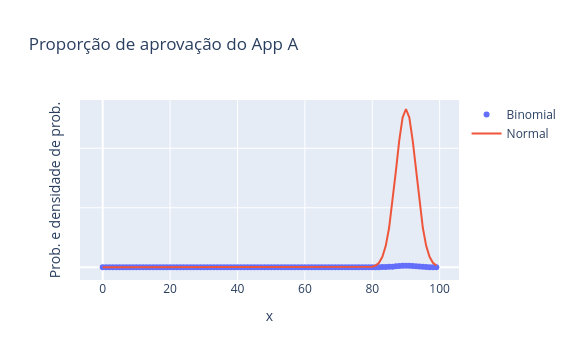

In [7]:
binomial_e_proporção_vs_normal(empresa_A, rescale_x=False, rescale_y=False)

## Binomial vs normal

Mudando a escala no eixo vertical...

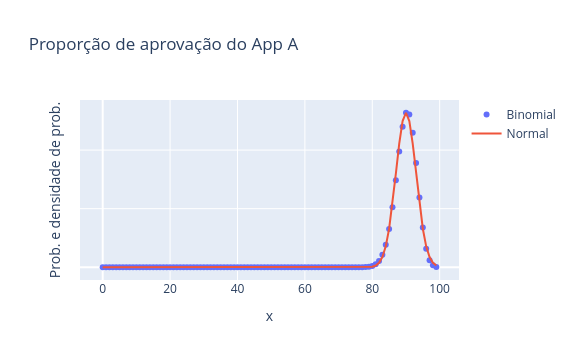

In [8]:
binomial_e_proporção_vs_normal(empresa_A, rescale_x=False, rescale_y=True)

## Proporção vs normal

Isto é, mudando a escala no eixo horizontal...

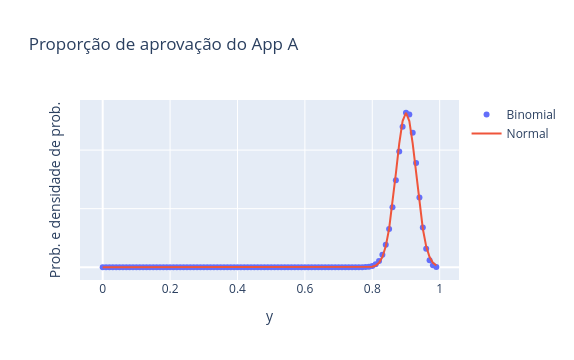

In [9]:
binomial_e_proporção_vs_normal(empresa_A, rescale_x=True, rescale_y=True)

# Abordagem não ingênua

Praticamente toda a área abaixo da curva normal está entre $\mu - 3\sigma$ e $\mu + 3\sigma$. Além disso, 95% da área reside aproximadamente entre $\mu - 2\sigma$ e $\mu + 2\sigma$. Esse é um bom - e comum - **intervalo de confiança** sobre $\mu$.

Para as empresas $A$ e $B$ temos:

In [12]:
dois_sigma_A = 2 * desvio_padrão_da_proporção(empresa_A)
print(round(empresa_A.p - dois_sigma_A, 2), '≤ p_A ≤', round(empresa_A.p + dois_sigma_A, 2))

dois_sigma_B = 2 * desvio_padrão_da_proporção(empresa_B)
print(round(empresa_B.p - dois_sigma_B, 2), '≤ p_B ≤', round(empresa_B.p + dois_sigma_B, 2))

0.84 ≤ p_A ≤ 0.96
0.74 ≤ p_B ≤ 0.76


Ou seja, $p_A$ (e $\pi_A$) é **quase** certamente maior que $p_B$, pois esses intervalos não apresentam interseção. Dá para ver isso graficamente. Vamos fazer isso.

A célula abaixo contém o código necessário para gerar o gráfico mais abaixo. Por hora você não precisa se ocupar em entendê-la, mas não perca a chance de fazer isso depois

In [13]:
def pdf_da_empresa(x: np.ndarray, empresa: Empresa):
    """
    Essa função calcula a densidade de probabilidade para cada valor da variável aleatória x
    para a empresa passada como argumento. Aqui nós usamos a distribuição normal para APROXIMAR
    a distribuição da proporção.
    """
    from scipy.stats import norm
    μ = empresa.p
    σ = desvio_padrão_da_proporção(empresa)
    return norm.pdf(x, μ, σ)

def pdf_da_empresa_versão_caseira(x, empresa: Empresa):
    """Equivalente à função acima, porém sem usar scipy"""
    μ = empresa.p
    σ = desvio_padrão_da_proporção(empresa)
    return (1/(σ * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - μ) / σ) ** 2)

def gráfico_das_duas_empresas(empresa_A: Empresa, empresa_B: Empresa, ajuste_y=False):
    import plotly.graph_objs as go
    import plotly.offline as pyo
    from plotly.offline import init_notebook_mode, iplot
    
    init_notebook_mode(connected=True)

    # Intervalo do eixo x (empresa.p) é [0,1]. 1000 pontos deve dar...
    x = np.linspace(0, 1, 1000)

    y_A = pdf_da_empresa(x, empresa_A)
    y_B = pdf_da_empresa(x, empresa_B)
    if ajuste_y:
        y_A /= np.max(y_A)  # Equivale a y_A = y_A / np.max(y_A)
        y_B /= np.max(y_B)
    
    trace1 = go.Scatter(x=x, y=y_A, mode='lines', name='Empresa A')
    trace2 = go.Scatter(x=x, y=y_B, mode='lines', name='Empresa B')
    
    layout = go.Layout(
        title='Proporção de aprovação das empresas A e B',
        xaxis=dict(title='y'),
        yaxis=dict(title='Densidade de probabilidade')
    )
    
    # Figura
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    
    # Render the plot in the Jupyter Lab window
    iplot(fig)

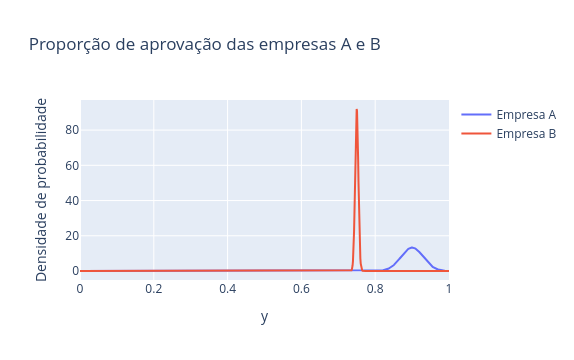

In [14]:
gráfico_das_duas_empresas(empresa_A, empresa_B, False)

## A abordagem certa: teste de hipótese

Teste de hipótese entre duas amostras.

$$
\begin{align}
H_0: &\quad p_A = p_B \\
H_a: &\quad p_A > p_B
\end{align}
$$

$p_A$ é o **parâmetro** que caracteriza o **modelo** que representa o app da empresa $A$.

Exemplo: se $p_A = 1$, **toda a população** avalia o app como "bom"; se $p_A = 0.5$, metade da população avalia o app como "bom".

Analogamente para $p_B$.


### Note:
- $\hat p_A$ (=`empresa_A.p`) é um **estimador pontual** de $p_A$.
- É $p_A$ que queremos **inferir**. Ou seja, avaliando $\hat p_A$ numa amostra, _inferimos_ $p_A$.

## Nível de confiança e significância; e valor crítico

Essa é uma escolha que fazemos. Na falta de um critério melhor, escolhemos o **nível de significância** padrão de 5% ou, equivalentemente, num **nível de confiança** de 95%.

Essa escolha leva a um **valor crítico** da estatística $z$, que podemos consultar numa tabela (aqui, por exemplo) ou usando Python:

In [15]:
from scipy.stats import norm

norm.ppf(0.95)  # ppf = Percent point function

1.6448536269514722

<div style="display: flex; align-items: center;">
    <!-- Thinking emoji -->
    <div style="font-size: 32px; margin-right: 10px; margin-top: 15px">📌</div>
    <div style="display: flex; align-items: center;">
        <div style="padding: 20px; border-radius: 15px; background-color: #f0f0f0; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); position: relative; margin-left: 20px;">
            <div style="content: ''; position: absolute; left: -30px; width: 0; height: 0; border-style: solid; border-width: 10px 30px 10px 0; border-color: transparent #f0f0f0 transparent transparent; top: 50%; transform: translateY(-50%); font-size: 20px"></div>
            <span style="font-size: 20px">O nível de confiança deve ser escolhido <span style="font-weight: bold">antes</span> do teste!</span>
        </div>
    </div>
</div>

## Receita de bolo: teste de duas proporções

A forma correta de abordar esse problema é através do chamado **teste $z$ para duas proporções**. Isso porque nós temos duas amostras: a da empresa $A$ e a da $B$. Além disso, estamos usando um teste $z$, que baseia-se na distribuição normal, pois o tamanho de cada amostra é grande (maior que da ordem de 30). Se não fosse, teríamos de usar a distribuição $t$.

Para colocar esse teste em prática, precisamos seguir o passo-a-passo abaixo. É meio obscuro, eu sei, mas o que estamos fazendo aqui é basicamente juntando as duas amostras numa só: veja como $\bar p$, a _proporção média_, é calculada. Já o _desvio padrão médio_ (em Inglês usa-se o termo _pooled_) é uma média ponderada nos graus de liberdade. Mas não vamos entrar nesses detalhes aqui.

$$
\begin{align}
x_A &= n_A \hat p_A \\
x_B &= n_B \hat p_B \\
\bar p &= \frac{x_A + x_B}{n_A + n_B} \\
\bar q &= 1 - \bar p \\
\bar s &= \bar p\bar q\left(\frac{1}{n_A}+\frac{1}{n_B}\right) \\
z &= \frac{\hat p_A - \hat p_B}{\sqrt{\bar s}} \qquad\leftarrow\text{estatística $z$}
\end{align}
$$

Reproduzindo as equações acima em Python, fica assim:

In [16]:
x_A = empresa_A.p * empresa_A.n  # Quantidade de sucessos (avaliações "boas")
x_B = empresa_B.p * empresa_B.n
p_médio = (x_A + x_B) / (empresa_A.n + empresa_B.n)
q_médio = 1 - p_médio
s_médio = np.sqrt(p_médio * q_médio * (1/empresa_A.n + 1/empresa_B.n))
z = (empresa_A.p - empresa_B.p) / s_médio  # Estatística z

print(z)

3.4537762382304362


A estatística $z$ obtida acima é superior ao valor crítico, de $\sim 1,645$. Isso significa que, se $p_A = p_B$, esse seria um resultado extremamente improvável de acontecer. É por isso que _aceitamos a hipótese alternativa_ ($H_a$). Na verdade, no espírito do método científico, nós dizemos que **temos evidências suficientes para rejeitar a hipótese nula** com nível de confiança de 95%.

In [17]:
def pdf_diferença_pA_pB(z: float):
    from scipy.stats import norm
    
    import plotly.graph_objs as go
    import plotly.offline as pyo
    from plotly.offline import init_notebook_mode, iplot
    
    init_notebook_mode(connected=True)
    
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, loc=0, scale=1)
    
    trace1 = go.Scatter(x=x, y=y, mode='lines', name='Binomial')
    
    x_fill = np.linspace(z, 4, 1000)
    y_fill = norm.pdf(x_fill, 0, 1)
    trace2 = go.Scatter(x=x_fill, y=y_fill, fill='tozeroy', fillcolor='rgba(0,100,80,0.3)', mode='none', name='Probabilidade')
    
    layout = go.Layout(
        title='Probabilidade da diferença pA-pB',
        xaxis=dict(title='pA-pB'),
        yaxis=dict(title='Densidade de probabilidade')
    )
    
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    iplot(fig)

## A estatística $z$, visualmente

O gráfico distingue as regiões separadas pelo **valor crítico $z = 1.6$**. Mas no nosso caso, o **estatística $z \approx 3.4$**.

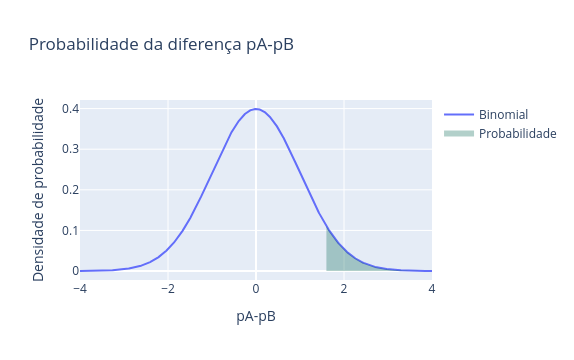

In [22]:
pdf_diferença_pA_pB(1.6)

Toda a área está à esquerda do **valor crítico**, indicando que a diferença que observamos, $\hat p_A - \hat p_B$, é muito **improvável**, caso $p_A = p_B$.

## Veredicto

- **Pragmaticamente**: o app da empresa $A$ é de fato melhor avaliado que o da $B$.
- **Estatisticamente**: temos evidências para rejeitar a hipótese nula, $H_0$. Ou, a **diferença observada** $\hat p_A - \hat p_B$ é estatisticamente significativa, indicando que $p_A > p_B$.

## Valor $p$

O valor $p$ é a área abaixo da distribuição normal **padrão** para $p > z$.

Em Python podemos usar a função `norm.cdf` (_cumulative density function_) ou `norm.sf` (_survival function_):

In [19]:
from scipy.stats import norm
valor_p = 1 - norm.cdf(z)
#valor_p = norm.sf(z)

print(f'{valor_p=}')

valor_p=0.00027639791808720116


### Usando `statsmodels`

O pacote statsmodels oferece uma implementação conveniente para vários testes de hipótese. Fica assim:

In [20]:
from statsmodels.stats.proportion import proportions_ztest

sucessos = np.array([
    round(empresa_A.n * empresa_A.p),  # Quantidade de sucessos (avaliações "boas")
    round(empresa_B.n * empresa_B.p),
])

avaliações = np.array([
    empresa_A.n,
    empresa_B.n
])

z, valor_p = proportions_ztest(sucessos, avaliações, alternative='larger')

print(f'{z=}')  # Dá uma olhada nesse jeito legal de imprimir ;-)
print(f'{valor_p=}')

z=3.4537762382304362
valor_p=0.00027639791808725195


Note que os resultados são os mesmos que aqueles que calculamos com a "receita de bolo".

## Atenção

Não mencionamos aqui, mas todo teste de hipótese baseia-se em algumas **suposições**, que devem ser verificadas para assegurar a validade do teste. No caso do _teste $z$ para proporções, você deve verificar que $n_Ap_A \ge 5$ e $n_A(1-p_A) \ge 5$; e similarmente para $B$.

Abaixo está a verificação para $A$. Faça o mesmo para $B$.

In [21]:
print('nA * pA = ', empresa_A.n * empresa_A.p)
print('nA * (1 - pA) = ', empresa_A.n * (1 - empresa_A.p))

nA * pA =  90.0
nA * (1 - pA) =  9.999999999999998


Observação: alguns autores defendem que $n_Ap_A \ge 10$ e $n_A(1-p_A) \ge 10$; e similarmente para $B$.

# Desafio

Altere os parâmetros do problema, modificando `empresa_A` e `empresa_B` e veja como isso afeta os gráficos e os resultados. Em particular, encontre uma configuração em que o valor $p$ é apenas ligeiramente maior que 5%. Dica: diminua a diferença entre $\hat p_A$ e $\hat p_B$ e/ou diminua a quantidade de avaliações, $n_A$ e $n_B$.